In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
filepath='/content/gdrive/My Drive/'
train = pd.read_csv(filepath+'instagram_train.csv')
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = pd.DataFrame(data = scaler.transform(train), columns = train.columns, index = train.index)
y_train = train['#fake']
X_train = train.drop('#fake',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0, shuffle=True)

print('X_train = ', X_train.shape)
print('X_valid = ', X_valid.shape)
print('y_train = ', y_train.shape)
print('y_valid = ', y_valid.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=2)
print(y_train.shape, y_valid.shape)

X_train =  (8000, 16)
X_valid =  (2000, 16)
y_train =  (8000,)
y_valid =  (2000,)
(8000, 2) (2000, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

def dnn_model():
  model=Sequential()

  #hidden layer #1
  model.add(Dense(units = (256), input_dim = 16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #2
  model.add(Dense(units = (128)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #3
  model.add(Dense(units = (64)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #4
  model.add(Dense(units = (32)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))  
  #hidden layer #5
  model.add(Dense(units = (16)))
  model.add(Activation('relu'))

  #output layer
  model.add(Dense(units=2))
  model.add(Activation('softmax'))

  return model

In [ ]:
model =dnn_model()
model.summary()
opti = tf.keras.optimizers.Adam(lr=0.001)
checkpoint_path = "model_checkpoint.ckpt"  #best model save
checkpoint = ModelCheckpoint(checkpoint_path, save_weight_only=True,save_best_only=True, monitor="val_loss",verbose=2)
model.compile(optimizer = opti,loss = 'binary_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               4352      
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
activation_7 (Activation)    (None, 128)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist = model.fit(X_train, y_train, epochs=200, verbose=True, batch_size=64, validation_data=(X_valid,y_valid), shuffle=False,callbacks=[checkpoint],)

Epoch 1/200
125/125 [==============================] - 2s 6ms/step - loss: 0.4817 - accuracy: 0.7874 - val_loss: 0.5615 - val_accuracy: 0.6615

Epoch 00001: val_loss improved from inf to 0.56145, saving model to model_checkpoint.ckpt
INFO:tensorflow:Assets written to: model_checkpoint.ckpt/assets
Epoch 2/200
125/125 [==============================] - 1s 4ms/step - loss: 0.3341 - accuracy: 0.8624 - val_loss: 0.3742 - val_accuracy: 0.8450

Epoch 00002: val_loss improved from 0.56145 to 0.37416, saving model to model_checkpoint.ckpt
INFO:tensorflow:Assets written to: model_checkpoint.ckpt/assets
Epoch 3/200
125/125 [==============================] - 1s 4ms/step - loss: 0.3116 - accuracy: 0.8669 - val_loss: 0.3008 - val_accuracy: 0.8825

Epoch 00003: val_loss improved from 0.37416 to 0.30082, saving model to model_checkpoint.ckpt
INFO:tensorflow:Assets written to: model_checkpoint.ckpt/assets
Epoch 4/200
125/125 [==============================] - 1s 4ms/step - loss: 0.3018 - accuracy: 0.87

In [ ]:
model.save(filepath+'Dnn_1.h5')

In [ ]:
df = pd.DataFrame(hist.history)
df.mean()

loss            0.149220
accuracy        0.940156
val_loss        0.216911
val_accuracy    0.927798
dtype: float64

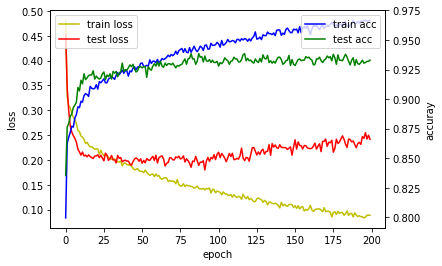

In [ ]:
# visualization
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='upper right')

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score  #정확도
score = model.evaluate(X_valid, y_valid, verbose=0)
print(int(score[1]*100))

93


# DNN TEST

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
drive.mount('/content/gdrive',force_remount=True)
filepath='/content/gdrive/My Drive/'
test = pd.read_csv(filepath+'instagram_test.csv')

Mounted at /content/gdrive


In [ ]:
model = load_model(filepath+'Dnn_1.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               4352      
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
activation_7 (Activation)    (None, 128)              

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(test)
train = pd.DataFrame(data = scaler.transform(test), columns = test.columns, index = test.index)
y_test = test['#fake']
X_test = test.drop('#fake',axis=1)

print('X_test = ', X_test.shape)
print('y_test = ', y_test.shape)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

X_test =  (100, 16)
y_test =  (100,)


In [ ]:
from sklearn.metrics import accuracy_score
score = model.evaluate(X_test, y_test, verbose=0)

print(int(score[1]*100))

91


In [ ]:
#테스트 파일 중에서 몇 번부터 몇번을 볼까?
for i in range(1,11):
  if y_test[i][0]>y_test[i][1]:
    print("Real Account")
  else:
    print("Fake Account!!")

Fake Account!!
Fake Account!!
Fake Account!!
Fake Account!!
Real Account
Real Account
Real Account
Real Account
Real Account
Real Account


In [ ]:
# TEST파일 중에서 골라서 예측  
dnn_y = model.predict(X_test[1:11])
for i in range(10):
  if dnn_y[i][0]>dnn_y[i][1]:
    print("Real Account")
  else:
    print("Fake Account!!")

Real Account
Fake Account!!
Fake Account!!
Fake Account!!
Real Account
Real Account
Real Account
Real Account
Real Account
Real Account
